# Simple Linear versus Ridge Regression by Nadja Fejzic
# February 2021

In [29]:
# Prone to overfitting - really good at predicting the training data but may not be good at generalizing - might be off with another dataset
# Cannot be used when the relation between independent and dependent variable is nonlinear

## Step 1:  Getting, understanding, and preprocessing the dataset

We first import the standard libaries and some libraries that will help us scale the data and perform some "feature engineering" by transforming the data into $\Phi_2({\bf x})$

In [30]:
# Importing libraries
import numpy as np
import sklearn
# Importing the boston dataset from sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
# Spliting data into training and testing sets
from sklearn.model_selection import train_test_split
# Modeling the relationship between a scalar respose (dependent variable) and one or more explainatory variables (independent variables)
import sklearn.linear_model 
from sklearn.model_selection import KFold

###  Importing the dataset

In [31]:
# Loading the dataset 
boston_data = load_boston()
print("This is the example of linear regression using Boston house prices dataset\n")
print(boston_data.DESCR)
print(boston_data.keys())

print("\n------------This is the actual data-------------\n")
print(boston_data)

This is the example of linear regression using Boston house prices dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
     

In [32]:
#  Creating X and Y variables - X holding the .data and Y holding .target 
X = boston_data.data #independent variables
y = boston_data.target #dependent variable - price of houses
feature_names = boston_data.feature_names

# Checking the dimensions of X and Y arrays (data arrays) 
print("The dimension of X: ", X.ndim)
print("The initial dimension of Y: ", y.ndim) 
# We see that Y is one dimensional array
# Reshaping Y to be a rank 2 matrix using y.reshape() since we have no row-column concept
y = y.reshape(-1,1)
# now we see it created one column to store the data in 
print("The dimension of Y after reshaping: ",y.ndim, "\n")

# Exploring the data
# Observing the number of features and the number of labels -- the number of columns
print("The number of features is: ", X.shape[1])

# Printing out the features -- columns
print("The features: ", feature_names, "\n")

# The number of examples -- the number of rows
print("The number of examples in our dataset: ", X.shape[0], "\n")

# Observing the first 2 rows of the data
print("The first two rows of the data:\n", X[0:2], "\n")
print("\nData:\n", X, "\n")
print("\nTarget:\n", y, "\n")

The dimension of X:  2
The initial dimension of Y:  1
The dimension of Y after reshaping:  2 

The number of features is:  13
The features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

The number of examples in our dataset:  506 

The first two rows of the data:
 [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]] 


Data:
 [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-

We will also create polynomial feeatures for the dataset to test linear and ridge regression on data with d = 1 and data with d = 2. Feel free to increase the # of degress and see what effect it has on the training and test error. 

In [33]:
# Createing a PolynomialFeatures object with degree = 2
# Transforming X and saving it into X_2 using poly.fit_transform(X)
# Simply copying Y into Y_2 

poly = PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)
y_2 = y 

#poly = PolynomialFeatures(degree=3)
#X_3 = poly.fit_transform(X)
#y_3 = y

In [34]:
# The shape of X_2 and Y_2 - should be (506, 105) and (506, 1) respectively

print("The shape of X_2 -- ", X_2.shape)
print("The shape of Y_2 -- ", y_2.shape)

#print(X_2)
#print(y_2)

The shape of X_2 --  (506, 105)
The shape of Y_2 --  (506, 1)


SIMPLE linear regression 

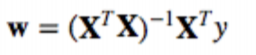

RIDGE linear regression


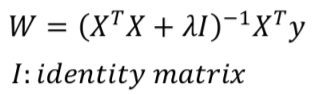

In [35]:
# Ridge linear regression
# Defining the get_coeff_ridge_normaleq function
# Returning w values

def get_coeff_ridge_normaleq(X_train, y_train, alpha):
    # Getting the number of rows and columns of X_train
    m, n = X_train.shape
    # Splitting W into two parts a and b for easier calculation
    a = np.linalg.pinv(np.dot(np.transpose(X_train), X_train) + alpha * np.identity(n)) #getting the appropriate identity matrix size
    b = np.dot(np.transpose(X_train), y_train)
    w = np.dot(a, b)

    return w
   
#get_coeff_ridge_normaleq(x_2, y_2, 0.5)

#m, n = (2,3)
#I = np.identity(n)
#print(n)
#print(I)
#c = np.arange(4).reshape((2,2))
#print(c)
#print(np.transpose(c))

In [36]:
# Simple linear regression
# Defining the get_coeff_linear_normaleq function.
# Returning w values

def get_coeff_linear_normaleq(X_train, y_train):
    a = np.linalg.pinv(np.dot(np.transpose(X_train), X_train))
    b = np.dot(np.transpose(X_train), y_train)
    w = np.dot(a, b)

    return w

#get_coeff_linear_normaleq(x_2, y_2)

In [37]:
# Evaluating errors
# Defining the evaluate_err_ridge function.
# Returning the train_error and test_error values

def evaluate_err(X_train, X_test, y_train, y_test, w): 
    #pred_train = prediction using w and X_train
    pred_train = np.dot(X_train, w)
    #pred_test = prediction using w and X_test
    pred_test = np.dot(X_test, w)
    
    train_error = np.mean(np.square(y_train - pred_train))
    test_error = np.mean(np.square(y_test - pred_test))
    
    return train_error, test_error

In [38]:
# Finish writting the k_fold_cross_validation function - used to estimate the skill of the model on new data
# Returns the average training error and average test error from the k-fold cross validation
# Sklearns K-Folds cross-validator: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

def k_fold_cross_validation(k, X, y, alpha):
    kf = KFold(n_splits=k, random_state=21, shuffle=True)
    total_E_val_test = 0
    total_E_val_train = 0
    # Creating empty arrays for errors so it's simple to find a mean value later on
    all_train_errors = []
    all_test_errors = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Centering the data so we do not need the intercept term (we could have also chose w_0=average y value)
        # Subtract y_train_mean from y_train and y_test
        y_train_mean = np.mean(y_train)
        y_train -= y_train_mean
        y_test -= y_train_mean
        
        # Scaling the data matrix
        scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Determining the training error and the testing error 

        # In case alpha is 0 - we will be using simple linear regression
        if alpha == 0:
            w = get_coeff_linear_normaleq(X_train, y_train)
            total_E_val_train, total_E_val_test = evaluate_err(X_train, X_test, y_train, y_test, w)
            print("\n--- Train Error --- ", total_E_val_train, " --- Test Error --- ", total_E_val_test)

        # Else we have ridge linear regression and we are passing different values of alpha
        else:
            w = get_coeff_ridge_normaleq(X_train, y_train, alpha) 
            total_E_val_train, total_E_val_test = evaluate_err(X_train, X_test, y_train, y_test, w)
            print("\n--- Train Error --- ", total_E_val_train, " --- Test Error --- ", total_E_val_test)
        
        # Appending the errors to the lists so we can easily find mean value 
        all_train_errors.append(total_E_val_train)
        all_test_errors.append(total_E_val_test)

    # Finding the mean
    mean_train_error = np.mean(all_train_errors)
    mean_test_error = np.mean(all_test_errors)
    # Printing the mean errors
    print("\nThe average Train Error is: ", mean_train_error)
    print("The average Test Error is: ", mean_test_error, "\n")

    return  total_E_val_test, total_E_val_train

In [39]:
# Testing various polynomial regressions (requirement 6) asked in the question, and the various regularization alphas (requirement 4)

# Number of k splits
k = 10
print("\n--------------- Testing first degree polynomial ----------------------")

# Simple linear regression
print("\n-------------- Simple Linear Regression -----------------")
k_fold_cross_validation(k, X, y, 0)
# Ridge linear regression
print("\n-------------- Ridge Linear Regression -----------------")
for i in np.logspace(1,7,num=13):
    print("--------------- Alpha value: ", i, " -----------------")
    k_fold_cross_validation(k, X, y, i)
    
print("\n--------------- Testing second degree polynomial ---------------------")
# Simple linear regression
print("\n-------------- Simple Linear Regression -----------------")
k_fold_cross_validation(k, X_2, y_2, 0)
# Ridge linear regression
print("\n-------------- Ridge Linear Regression -----------------")
for i in np.logspace(1,7,num=13):
    print("--------------- Alpha value: ", i, " -----------------")
    k_fold_cross_validation(k, X_2, y_2, i) 



--------------- Testing first degree polynomial ----------------------

-------------- Simple Linear Regression -----------------

--- Train Error ---  20.24449673622922  --- Test Error ---  37.10404242136755

--- Train Error ---  22.585288719515688  --- Test Error ---  17.124437638486523

--- Train Error ---  21.210327793796587  --- Test Error ---  29.085058645356895

--- Train Error ---  22.103993371741506  --- Test Error ---  20.750965145964653

--- Train Error ---  22.725969159268512  --- Test Error ---  15.480509662951537

--- Train Error ---  22.085862090246614  --- Test Error ---  21.168944735113563

--- Train Error ---  23.2180545765112  --- Test Error ---  10.543450662554815

--- Train Error ---  21.19189183114535  --- Test Error ---  29.64230462865989

--- Train Error ---  22.360749008114812  --- Test Error ---  18.71020551186712

--- Train Error ---  20.335202471941134  --- Test Error ---  36.750767001958714

The average Train Error is:  21.806183575851062
The average Test 

**Conclusion:**

If I was given a choice of predicting future housing prices using one of the models, either simple linear or ridge linear regression I would choose the simple one, since when considering polynomial data (X_2) we can easily conclude that testing and training errors are the smallest (5 and 11) which makes it a better model.
Moreover, as alpha valu is increasing, both errors are increasing in ridge linear regression.
